In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
DATA_ROOT = '/kaggle/input/retinal-disease-classification'

train_dir = os.path.join(DATA_ROOT, 'Training_Set', 'Training_Set')
val_dir = os.path.join(DATA_ROOT, 'Evaluation_Set', 'Evaluation_Set')
test_dir = os.path.join(DATA_ROOT, 'Test_Set', 'Test_Set')

train_img_paths = glob.glob(os.path.join(train_dir, 'Training', '*.png'))
train_label_path = os.path.join(train_dir, 'RFMiD_Training_Labels.csv')

val_img_paths = glob.glob(os.path.join(val_dir, 'Validation', '*.png'))
val_label_path = os.path.join(val_dir, 'RFMiD_Validation_Labels.csv')

test_img_paths = glob.glob(os.path.join(test_dir, 'Test', '*.png'))
test_label_path = os.path.join(test_dir, 'RFMiD_Testing_Labels.csv')

len(train_img_paths), len(val_img_paths), len(test_img_paths)

(1920, 640, 640)

In [4]:
train_label_df = pd.read_csv(train_label_path)
val_label_df = pd.read_csv(val_label_path)
test_label_df = pd.read_csv(test_label_path)

print(f'Num. train labels: {len(train_label_df)}')
print(f'Num. val labels: {len(val_label_df)}')
print(f'Num. test labels: {len(test_label_df)}')

Num. train labels: 1920
Num. val labels: 640
Num. test labels: 640


In [5]:
# show labels in train set
train_label_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1916,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1916,1917,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1917,1918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1918,1919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_label_df.columns, len(train_label_df.columns)

(Index(['ID', 'Disease_Risk', 'DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN',
        'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST',
        'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS',
        'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF',
        'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL'],
       dtype='object'),
 47)

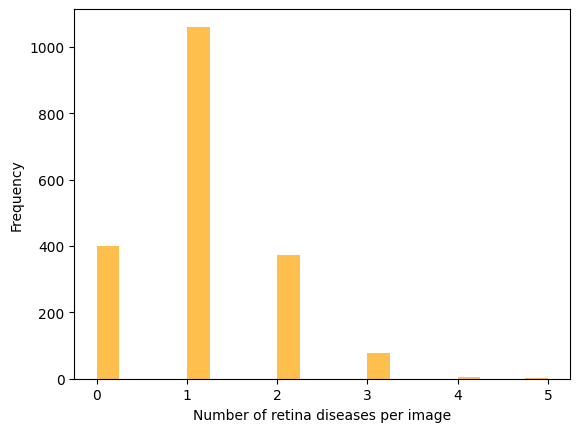

In [7]:
n_diseases_per_sample = train_label_df.drop(columns=['ID', 'Disease_Risk']).sum(axis=1)

plt.hist(n_diseases_per_sample, bins=20, color='orange', alpha=0.7)
plt.xlabel('Number of retina diseases per image')
plt.ylabel('Frequency')
plt.show()

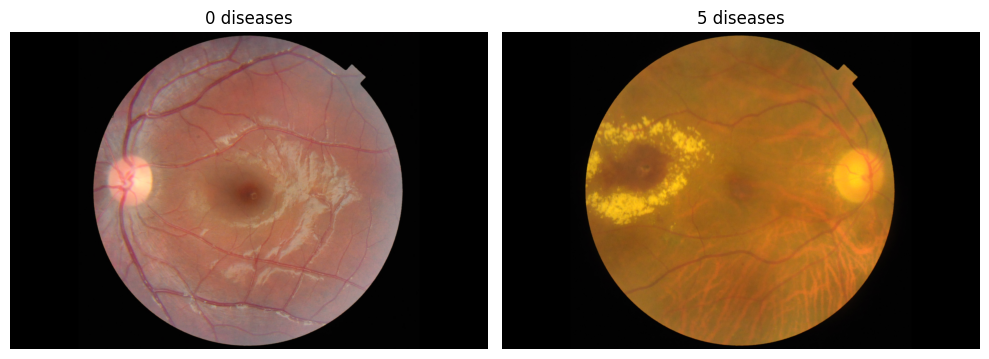

In [8]:
id_0di = (n_diseases_per_sample == 0).idxmax()
id_5di = (n_diseases_per_sample == 5).idxmax()

img_0di_path = os.path.join(train_dir, 'Training', f'{id_0di+1}.png')
img_5di_path = os.path.join(train_dir, 'Training', f'{id_5di+1}.png')

def load_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

img_0di, img_5di = load_img(img_0di_path), load_img(img_5di_path)

# Plot the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_0di)
plt.title('0 diseases')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_5di)
plt.title('5 diseases')
plt.axis('off')

plt.tight_layout()
plt.show()

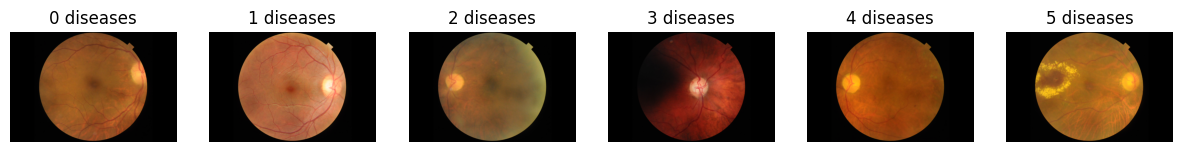

In [9]:
plt.figure(figsize=(15, 5))
np.random.seed(42)

for i in range(6):  # 0 to 5 diseases
    indices_i = n_diseases_per_sample.index[n_diseases_per_sample == i].tolist()
    if indices_i:
        id_i = np.random.choice(indices_i)  # Get a random index for the current disease count
        img_i_path = os.path.join(train_dir, 'Training', f'{id_i+1}.png')
        img_i = load_img(img_i_path)

        plt.subplot(1, 6, i + 1)
        plt.imshow(img_i)
        plt.title(f'{i} diseases')
        plt.axis('off')

plt.show()

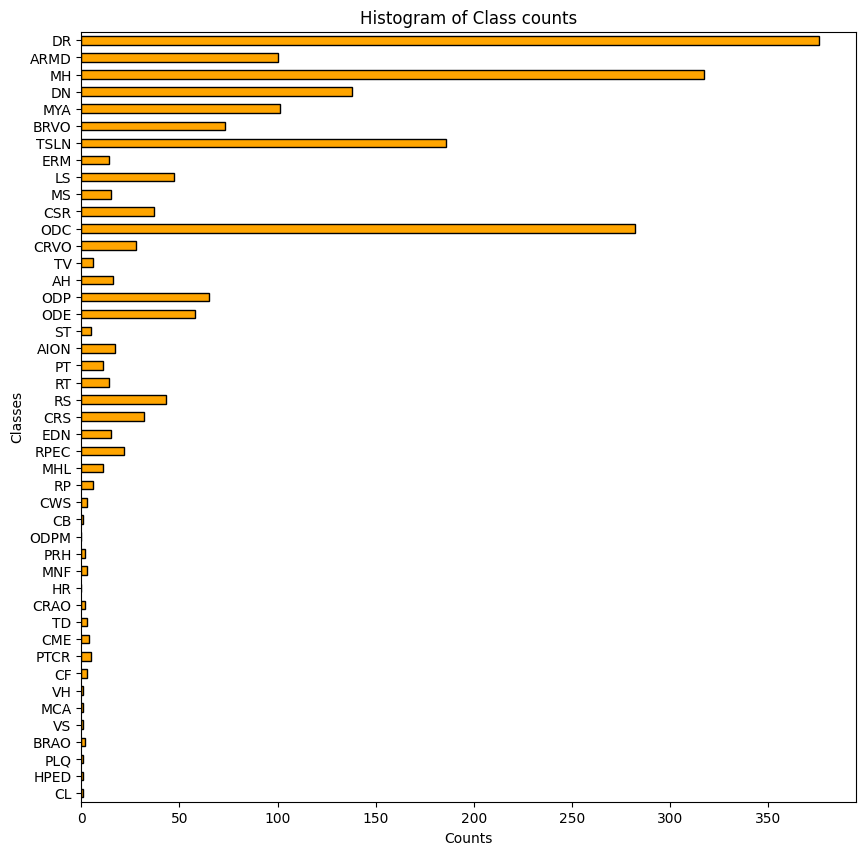

In [10]:
classes_freq = train_label_df.drop(columns=['ID', 'Disease_Risk']).sum(axis=0)[::-1]

plt.figure(figsize=(10, 10))  # Adjust the width and height as needed
classes_freq.plot(kind='barh', color='orange', edgecolor='black')

plt.title('Histogram of Class counts')
plt.xlabel('Counts')
plt.ylabel('Classes')

plt.show()

In [11]:
classes_freq.loc[classes_freq == 0]

HR      0
ODPM    0
dtype: int64

In [12]:
from torch.utils.data import Dataset
from PIL import Image

def path2id(img_path):
    return int(os.path.splitext(os.path.basename(img_path))[0])

class RetinaDataset(Dataset):
    
    def __init__(self, img_paths, label_csv_path, transform=None):
        self.img_paths = sorted(img_paths)
        self.label_df = pd.read_csv(label_csv_path).drop(columns=['ID', 'Disease_Risk', 'HR', 'ODPM'])
        self.transform = transform
    
    def __len__(self): 
        return len(self.img_paths)
    
    def __getitem__(self, id):
        img_path = self.img_paths[id]
        img_id = path2id(img_path)
        img = Image.open(img_path)
        label = np.array(self.label_df.iloc[img_id - 1]) # Index to frame is image ID - 1, see the note earlier
        if self.transform is not None:
            img = self.transform(img)
            label = torch.from_numpy(label).float()
        else:
            img = np.array(img)
        return img, label

In [13]:
# test the dataset correctness, without transform
ID = 0

data = RetinaDataset(train_img_paths, train_label_path)

img, label = data[ID]
img.shape, img.dtype, label.shape, label.dtype

((1424, 2144, 3), dtype('uint8'), (43,), dtype('int64'))

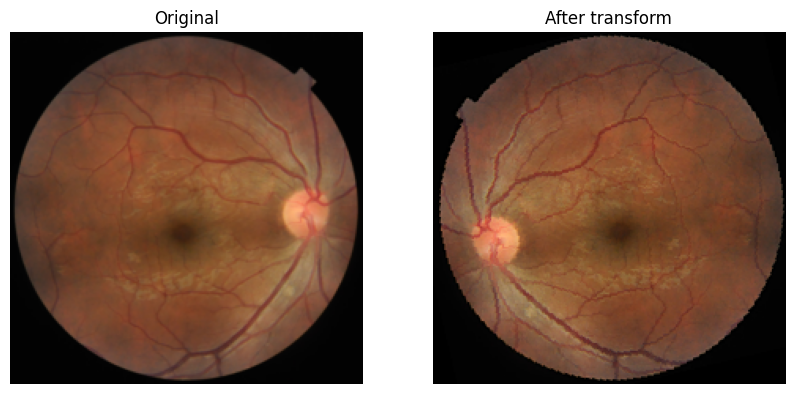

In [14]:
import torchvision.transforms.v2 as transforms

img_path = train_img_paths[8]
img = Image.open(img_path)

tf1 = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
])

tf2 = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomAdjustSharpness(2, 1),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.CenterCrop(224),
])

img1, img2 = tf1(img), tf2(img)

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.axis('off')
plt.title('Original')
plt.imshow(img1)

plt.subplot(122)
plt.title('After transform')
plt.imshow(img2)
plt.axis('off')
plt.show()

In [15]:
(np.array(img1) != np.array(img2)).sum()

130188

In [16]:
import torchvision.transforms.v2 as transforms

PRET_MEANS = [0.485, 0.456, 0.406]
PRET_STDS = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomAdjustSharpness(2, 0.8),
    transforms.RandomRotation(180),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.CenterCrop(224),
    transforms.ToImage(),
    transforms.ConvertImageDtype(torch.float32),
    transforms.Normalize(mean=PRET_MEANS, std=PRET_STDS)
])

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToImage(),
    transforms.ConvertImageDtype(torch.float32),
    transforms.Normalize(mean=PRET_MEANS, std=PRET_STDS)
])

In [17]:
train_data = RetinaDataset(train_img_paths, train_label_path, train_transform)
val_data = RetinaDataset(val_img_paths, val_label_path, test_transform)
test_data = RetinaDataset(test_img_paths, test_label_path, test_transform)

img, label = train_data[ID]
img.shape, img.dtype, label.shape, label.dtype

(torch.Size([3, 224, 224]), torch.float32, torch.Size([43]), torch.float32)

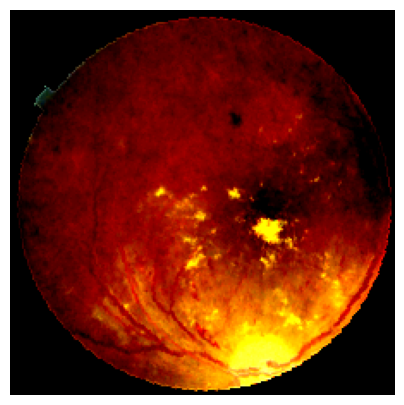

In [18]:
plt.figure(figsize=(5,5))
plt.imshow(img.permute(1,2,0).cpu().numpy())
plt.axis('off')
plt.show()

In [19]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64
# WEIGHT_DECAY = 1e-5
N_WORKERS = os.cpu_count()

train_loader = DataLoader(train_data,
                           batch_size=BATCH_SIZE,
                           shuffle=True,
                           num_workers=N_WORKERS,
                           pin_memory=True)

val_loader = DataLoader(val_data,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=N_WORKERS,
                         pin_memory=True)

test_loader = DataLoader(test_data,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=N_WORKERS,
                         pin_memory=True)

In [20]:
from torchvision import models
from torch import nn

model = models.convnext_tiny(weights='IMAGENET1K_V1')

# replace final layer in classifier
in_final = model.classifier[-1].in_features
OUT_FINAL = 43
model.classifier[-1] = nn.Linear(in_final, OUT_FINAL)
model.classifier

Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny-983f1562.pth
100%|██████████| 109M/109M [00:00<00:00, 175MB/s]  


Sequential(
  (0): LayerNorm2d((768,), eps=1e-06, elementwise_affine=True)
  (1): Flatten(start_dim=1, end_dim=-1)
  (2): Linear(in_features=768, out_features=43, bias=True)
)

In [21]:
# Number of parameters
sum(p.numel() for p in model.parameters())

27853195

In [22]:
from torch import optim
from torch.optim.lr_scheduler import _LRScheduler
from tqdm import tqdm

START_LR = 1e-7

optimizer = optim.AdamW(model.parameters(), lr=START_LR)
loss_fn = nn.BCEWithLogitsLoss().to(device)
model = model.to(device)

class LRFinder:
    
    def __init__(self, model, optimizer, criterion, device):
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.device = device
        torch.save(model.state_dict(), 'init_params.pt')

    def _train_batch(self, iterator):
        self.model.train()
        self.optimizer.zero_grad()
        x, y = iterator.get_batch()
        x = x.to(self.device)
        y = y.to(self.device)
        y_pred = model(x)
        loss = self.criterion(y_pred, y)
        loss.backward()
        self.optimizer.step()
        return loss.item()

    def range_test(self, iterator, end_lr=10, num_iter=100,
                    smooth_f=0.05, diverge_th=5):
        lrs=[]
        losses=[]
        best_loss = float('inf')

        lr_scheduler = ExponentialLR(self.optimizer, end_lr, num_iter)
        iterator = IteratorWrapper(iterator)

        for iteration in tqdm(range(num_iter)):
            loss = self._train_batch(iterator)
            lrs.append(lr_scheduler.get_last_lr()[0])

            # update lr
            lr_scheduler.step()

            if iteration > 0:
                loss = smooth_f * loss + (1 - smooth_f) * losses[-1]

            if loss < best_loss:
                best_loss = loss

            losses.append(loss)

            if loss > diverge_th * best_loss:
                print("Stopping early, the loss has diverged")
                break

        # reset model to initial parameters
        model.load_state_dict(torch.load('init_params.pt'))
        return lrs, losses

class ExponentialLR(_LRScheduler):
    def __init__(self, optimizer, end_lr, num_iter, last_epoch=-1):
        self.end_lr = end_lr
        self.num_iter = num_iter
        super().__init__(optimizer, last_epoch)

    def get_lr(self):
        cur_iter = self.last_epoch
        r = cur_iter / self.num_iter
        return [base_lr * ((self.end_lr / base_lr) ** r) for base_lr in self.base_lrs]

class IteratorWrapper():
    def __init__(self, iterator):
        self.iterator = iterator
        self._iterator = iter(iterator)

    def __next__(self):
        try:
            inputs, labels = next(self._iterator)
        except StopIteration:
            self._iterator = iter(self.iterator)
            inputs, labels, *_ = next(self._iterator)
        return inputs, labels

    def get_batch(self):
        return next(self)

In [23]:
END_LR = 10
NUM_ITER = 100

lr_finder = LRFinder(model, optimizer, loss_fn, device)
lrs, losses = lr_finder.range_test(train_loader, END_LR, NUM_ITER)

 87%|████████▋ | 87/100 [05:51<00:52,  4.04s/it]

Stopping early, the loss has diverged



/tmp/ipykernel_36/301910286.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('init_params.pt'))


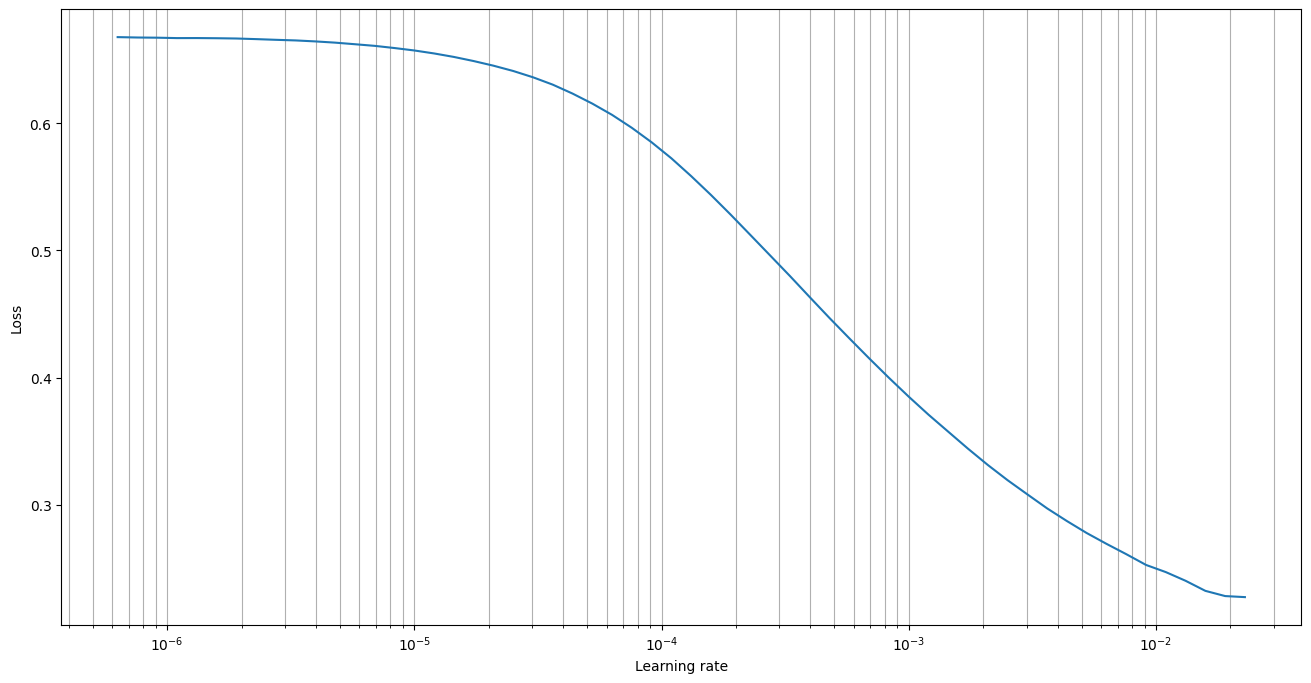

In [24]:
def plot_lr_finder(lrs, losses, skip_start=5, skip_end=5):
    if skip_end == 0:
        lrs = lrs[skip_start:]
        losses = losses[skip_start:]
    else:
        lrs = lrs[skip_start:-skip_end]
        losses = losses[skip_start:-skip_end]

    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(lrs, losses)
    ax.set_xscale('log')
    ax.set_xlabel('Learning rate')
    ax.set_ylabel('Loss')
    ax.grid(True, 'both', 'x')
    plt.show()

plot_lr_finder(lrs, losses, skip_start=10, skip_end=20)

In [25]:
LR_FOUND = 2e-3

loss_fn = nn.BCEWithLogitsLoss().to(device)
model = model.to(device)

# using smaller learning rate for feature extractor compared to classifier
lr_params = [
    {'params': model.features.parameters(), 'lr': LR_FOUND / 10},
    {'params': model.classifier.parameters(), 'lr': LR_FOUND}
]

optimizer = optim.AdamW(lr_params)

In [26]:
def accuracy(y_h, y):
    y_h = (y_h > 0.5).float()
    return (y_h == y).float().mean(dim=1).mean()

def train_epoch(model, loader, loss_fn, optimizer, device, epoch):
    model.train()
    lossi, acci = [], []

    for x, y in tqdm(loader, desc=f'Epoch {epoch}'):
        x, y = x.to(device), y.to(device)
        y_h = model(x)
        loss = loss_fn(y_h, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
        
        y_h, y = y_h.detach().cpu(), y.detach().cpu()
        acc = accuracy(y_h, y)
        acci.append(acc)

    loss = torch.tensor(lossi).mean().item()
    acc = torch.tensor(acci).mean().item()
    return {'loss': loss, 'acc': acc}

def eval(model, loader, loss_fn, device):
    model.eval()
    lossi, acci = [], []

    with torch.no_grad():
        for x, y in tqdm(loader, desc='Evaluation'):
            x, y = x.to(device), y.to(device)
            y_h = model(x)
            loss = loss_fn(y_h, y)
            lossi.append(loss.item())
            
            y_h, y = y_h.detach().cpu(), y.detach().cpu()
            acc = accuracy(y_h, y)
            acci.append(acc)

    loss = torch.tensor(lossi).mean().item()
    acc = torch.tensor(acci).mean().item()
    return {'loss': loss, 'acc': acc}

In [27]:
N_EPOCHS = 12
best_loss = float('inf')

train_resi, val_resi = [], []
BEST_MODEL = ''

no_improvement_count = 0
max_no_improvement = 3  # Set the threshold for consecutive epochs without improvement

for epoch in range(N_EPOCHS):
    train_res = train_epoch(model, train_loader, loss_fn, optimizer, device, epoch+1)
    val_res = eval(model, val_loader, loss_fn, device)
    
    print('- Train')
    print(f"  Loss: {train_res['loss']: 3.4f} | "
          f"Accuracy: {train_res['acc']: .3f}")

    print('- Validation')
    print(f"  Loss: {val_res['loss']: 3.4f} | "
          f"Accuracy: {val_res['acc']: .3f}")

    val_loss = val_res['loss']
    
    if val_loss < best_loss:
        best_loss = val_loss
        BEST_MODEL = f'convnext_cp_{epoch+1}.pth'
        torch.save(model.state_dict(), BEST_MODEL)
        print('* Current best loss. Saved model!')
        no_improvement_count = 0  # Reset the counter since there's an improvement
    else:
        no_improvement_count += 1

    if no_improvement_count >= max_no_improvement:
        print(f'No improvement in validation loss for {max_no_improvement} consecutive epochs. Stopping training.')
        break

    train_resi.append(train_res)
    val_resi.append(val_res)

Evaluation: 100%|██████████| 10/10 [00:39<00:00,  3.95s/it]


- Train
  Loss:  0.1273 | Accuracy:  0.974
- Validation
  Loss:  0.0817 | Accuracy:  0.977
* Current best loss. Saved model!


Evaluation: 100%|██████████| 10/10 [00:36<00:00,  3.63s/it]


- Train
  Loss:  0.0705 | Accuracy:  0.979
- Validation
  Loss:  0.0677 | Accuracy:  0.980
* Current best loss. Saved model!


Evaluation: 100%|██████████| 10/10 [00:34<00:00,  3.45s/it]


- Train
  Loss:  0.0578 | Accuracy:  0.981
- Validation
  Loss:  0.0618 | Accuracy:  0.980
* Current best loss. Saved model!


Evaluation: 100%|██████████| 10/10 [00:35<00:00,  3.57s/it]


- Train
  Loss:  0.0496 | Accuracy:  0.983
- Validation
  Loss:  0.0566 | Accuracy:  0.981
* Current best loss. Saved model!


Evaluation: 100%|██████████| 10/10 [00:37<00:00,  3.72s/it]


- Train
  Loss:  0.0407 | Accuracy:  0.986
- Validation
  Loss:  0.0526 | Accuracy:  0.982
* Current best loss. Saved model!


Evaluation: 100%|██████████| 10/10 [00:36<00:00,  3.63s/it]


- Train
  Loss:  0.0347 | Accuracy:  0.987
- Validation
  Loss:  0.0515 | Accuracy:  0.983
* Current best loss. Saved model!


Evaluation: 100%|██████████| 10/10 [00:36<00:00,  3.66s/it]


- Train
  Loss:  0.0303 | Accuracy:  0.989
- Validation
  Loss:  0.0512 | Accuracy:  0.984
* Current best loss. Saved model!


Evaluation: 100%|██████████| 10/10 [00:34<00:00,  3.49s/it]


- Train
  Loss:  0.0255 | Accuracy:  0.990
- Validation
  Loss:  0.0513 | Accuracy:  0.984


Evaluation: 100%|██████████| 10/10 [00:35<00:00,  3.53s/it]


- Train
  Loss:  0.0208 | Accuracy:  0.992
- Validation
  Loss:  0.0514 | Accuracy:  0.984


Evaluation: 100%|██████████| 10/10 [00:35<00:00,  3.56s/it]

- Train
  Loss:  0.0179 | Accuracy:  0.993
- Validation
  Loss:  0.0583 | Accuracy:  0.983
No improvement in validation loss for 3 consecutive epochs. Stopping training.


In [28]:
model.load_state_dict(torch.load(BEST_MODEL))

/tmp/ipykernel_36/3164802138.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(BEST_MODEL))


<All keys matched successfully>

In [29]:
import json

SAVE_RES = {
    'train': train_resi,
    'val': val_resi
}

with open('convnext_retina_result.json', 'w') as f:
    json.dump(SAVE_RES, f)

In [30]:
def true_positive(y_pred, y_true, th=0.5):
    assert y_pred.shape == y_true.shape
    y_pred = (y_pred > th).float()
    true_positive = torch.sum((y_pred == 1) & (y_true == 1), dim=0)
    return true_positive

def false_positive(y_pred, y_true, th=0.5):
    assert y_pred.shape == y_true.shape
    y_pred = (y_pred > th).float()
    false_positive = torch.sum((y_pred == 1) & (y_true == 0), dim=0)
    return false_positive

def false_negative(y_pred, y_true, th=0.5):
    assert y_pred.shape == y_true.shape
    y_pred = (y_pred > th).float()
    false_negative = torch.sum((y_pred == 0) & (y_true == 1), dim=0)
    return false_negative

In [31]:
# test function correctness
y_true = torch.tensor([[0,1,1,0], [0,1,0,1]])
y_pred = torch.tensor([[0,1,0,1], [1,0,0,1]])

print('True positive:', true_positive(y_pred, y_true))
print('False positive:', false_positive(y_pred, y_true))
print('False negative:', false_negative(y_pred, y_true))

True positive: tensor([0, 1, 0, 1])
False positive: tensor([1, 0, 0, 1])
False negative: tensor([0, 1, 1, 0])


In [32]:
true_pos, false_pos, false_neg = torch.zeros(OUT_FINAL), torch.zeros(OUT_FINAL), torch.zeros(OUT_FINAL)

model.eval()
with torch.no_grad():
    for x, y in tqdm(val_loader, desc='Evaluation'):
        x, y = x.to(device), y.to(device)
        y_h = model(x)
        y_h, y = y_h.detach().cpu(), y.detach().cpu()
        
        tp = true_positive(y_h, y)
        fp = false_positive(y_h, y)
        fn = false_negative(y_h, y)
        
        true_pos += tp; false_pos += fp; false_neg += fn

Evaluation: 100%|██████████| 10/10 [00:34<00:00,  3.49s/it]


In [33]:
precision = true_pos / (true_pos + false_pos + 1e-10)
precision

tensor([0.8739, 0.6333, 0.7895, 0.5714, 0.8485, 0.9091, 0.8276, 0.0000, 0.8000,
        0.0000, 0.0000, 0.5614, 1.0000, 0.0000, 0.0000, 1.0000, 0.8125, 0.0000,
        0.0000, 0.0000, 1.0000, 0.8667, 0.0000, 0.3333, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [34]:
recall = true_pos / (true_pos + false_neg + 1e-10)
recall

tensor([0.7879, 0.5000, 0.7353, 0.2609, 0.8235, 0.4348, 0.3692, 0.0000, 0.4706,
        0.0000, 0.0000, 0.4444, 0.5000, 0.0000, 0.0000, 0.0385, 0.6190, 0.0000,
        0.0000, 0.0000, 0.5000, 0.9286, 0.0000, 0.2000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [35]:
f1 = 2 * (precision * recall) / (precision + recall + 1e-10)
f1

tensor([0.8287, 0.5588, 0.7614, 0.3582, 0.8358, 0.5882, 0.5106, 0.0000, 0.5926,
        0.0000, 0.0000, 0.4961, 0.6667, 0.0000, 0.0000, 0.0741, 0.7027, 0.0000,
        0.0000, 0.0000, 0.6667, 0.8966, 0.0000, 0.2500, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [36]:
def eval3(model, loader, device):
    true_pos, false_pos, false_neg = torch.zeros(OUT_FINAL), torch.zeros(OUT_FINAL), torch.zeros(OUT_FINAL)

    model.eval()
    with torch.no_grad():
        for x, y in tqdm(loader, desc='Evaluation on 3 metrics'):
            x, y = x.to(device), y.to(device)
            y_h = model(x)
            y_h, y = y_h.detach().cpu(), y.detach().cpu()

            tp = true_positive(y_h, y)
            fp = false_positive(y_h, y)
            fn = false_negative(y_h, y)

            true_pos += tp; false_pos += fp; false_neg += fn
            
    precision = true_pos / (true_pos + false_pos + 1e-10)
    recall = true_pos / (true_pos + false_neg + 1e-10)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-10)
    return {
        'precision': precision, 'recall': recall, 'f1': f1
    }

test_result = eval3(model, test_loader, device)

Evaluation on 3 metrics: 100%|██████████| 10/10 [00:43<00:00,  4.31s/it]


In [37]:
test_result['precision']

tensor([0.8857, 0.7500, 0.8018, 0.5714, 0.9259, 0.9167, 0.8000, 0.0000, 1.0000,
        0.5000, 1.0000, 0.6735, 0.8333, 0.0000, 1.0000, 0.8000, 0.9091, 0.0000,
        0.0000, 0.0000, 0.0000, 0.6667, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [38]:
test_result['recall']

tensor([0.7500, 0.5806, 0.8558, 0.1739, 0.7812, 0.4783, 0.3019, 0.0000, 0.4000,
        0.1429, 0.0769, 0.3626, 0.5556, 0.0000, 0.4000, 0.1667, 0.5882, 0.0000,
        0.0000, 0.0000, 0.0000, 0.5714, 0.0000, 0.0000, 0.0000, 0.3333, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [39]:
test_result['f1']

tensor([0.8122, 0.6545, 0.8279, 0.2667, 0.8475, 0.6286, 0.4384, 0.0000, 0.5714,
        0.2222, 0.1429, 0.4714, 0.6667, 0.0000, 0.5714, 0.2759, 0.7143, 0.0000,
        0.0000, 0.0000, 0.0000, 0.6154, 0.0000, 0.0000, 0.0000, 0.5000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [40]:
test_res = eval(model, test_loader, loss_fn, device)

Evaluation: 100%|██████████| 10/10 [00:39<00:00,  3.95s/it]


In [41]:
print('- Test')
print(f"  Loss: {test_res['loss']: 3.4f} | "
      f"Accuracy: {test_res['acc']: .3f}")

- Test
  Loss:  0.0474 | Accuracy:  0.985


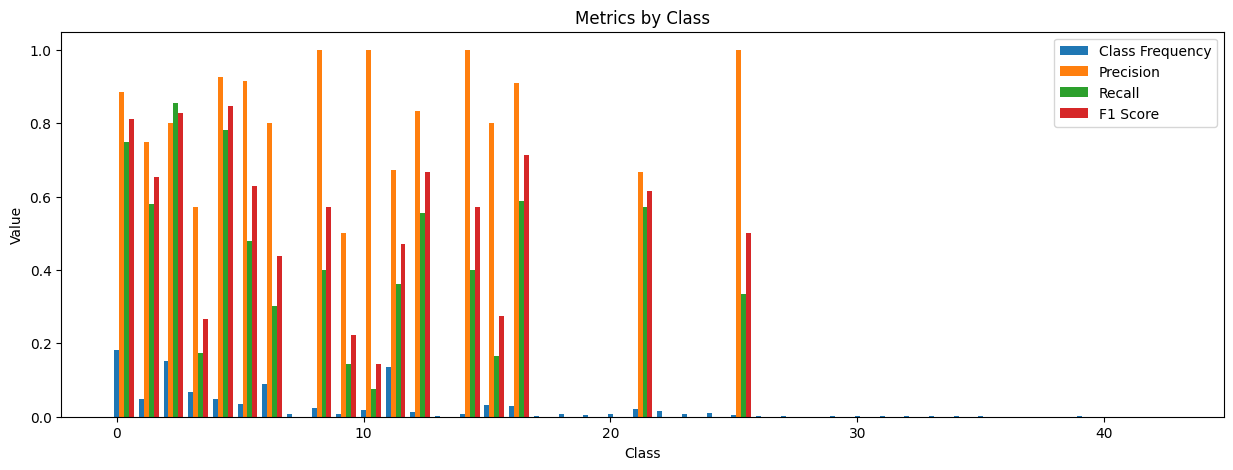

In [42]:
bar_width = 0.2
index = np.arange(OUT_FINAL)
classes_count = classes_freq.drop(['HR', 'ODPM'])
classes_prob = classes_count / classes_count.sum()
classes_prob = classes_prob[::-1]

# Plotting the bars
plt.figure(figsize=(15,5))
plt.bar(index, classes_prob, width=bar_width, label='Class Frequency')
plt.bar(index + 1 * bar_width, test_result['precision'], width=bar_width, label='Precision')
plt.bar(index + 2 * bar_width, test_result['recall'], width=bar_width, label='Recall')
plt.bar(index + 3 * bar_width, test_result['f1'], width=bar_width, label='F1 Score')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Value')
plt.title('Metrics by Class')
plt.legend()